In [1]:
from qiskit.transpiler.coupling import CouplingMap

from src.clonk.backend_utils.mock_backends.Corral_backend_v1 import FakeCorral
import numpy as np


def pretty_print(edge_list, simple=False):
    if simple:
        temp = list(edge_list)
        temp2 = []
        for i, j in temp:
            if not (j, i) in temp2:
                temp2.append((i, j))
        edge_list = temp2

    x = CouplingMap(edge_list)

    # black magic errors when I modify the draw function directly in the CouplingMap file so Im just copying the code here to make it work
    import pydot
    from PIL import Image
    import io

    formatter2 = lambda _: dict(dir="none")
    dot_str = x.graph.to_dot(edge_attr=formatter2, graph_attr={"size": "0"})
    dot = pydot.graph_from_dot_data(dot_str)[0]
    png = dot.create_png(prog="sfdp")
    pdf = dot.create_pdf(prog="sfdp")
    # png = dot.create_png(prog="neato")
    return Image.open(io.BytesIO(png))

In [2]:
# define corral
def corral(num_snails=32, num_levels=2):
    """returns edge list of a corral of size specified
    snails are nodes, edges are qubits"""

    snail_edge_list = []
    for snail0, snail1 in zip(range(num_snails), range(1, num_snails + 1)):
        for i in range(num_levels):
            snail_edge_list.append((snail0, snail1 % num_snails))
    return snail_edge_list

In [3]:
def snail_to_connectivity(snail_edge_list):
    # Convert snail edge list where nodes are snails and edges are qubits
    # To connectivity edge list where nodes are qubits and edges are coupling
    edge_list = []

    # qubits are coupled to a snail edge if they are both adjacent to a snail node
    for qubit, snail_edge in enumerate(snail_edge_list):
        for temp_qubit, temp_snail_edge in enumerate(snail_edge_list):
            if qubit != temp_qubit and (
                snail_edge[0] in temp_snail_edge or snail_edge[1] in temp_snail_edge
            ):
                edge_list.append((qubit, temp_qubit))
    return edge_list

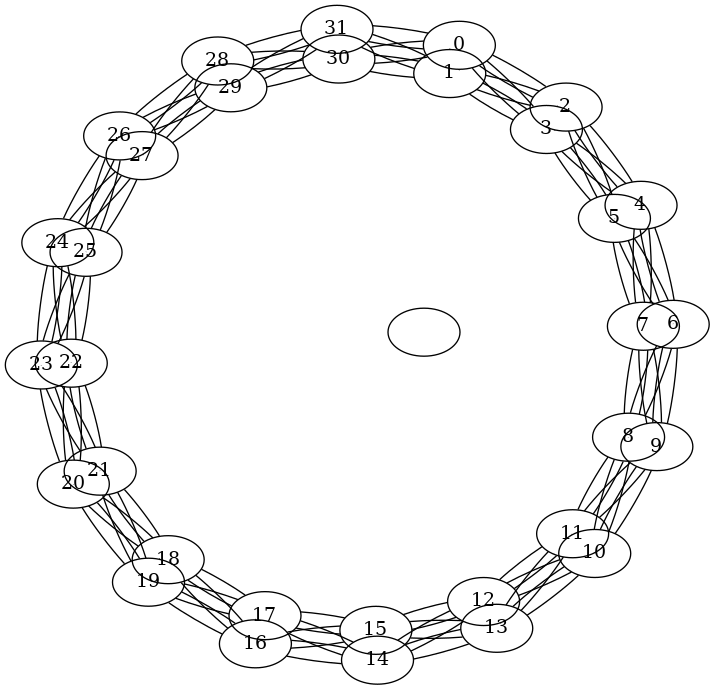

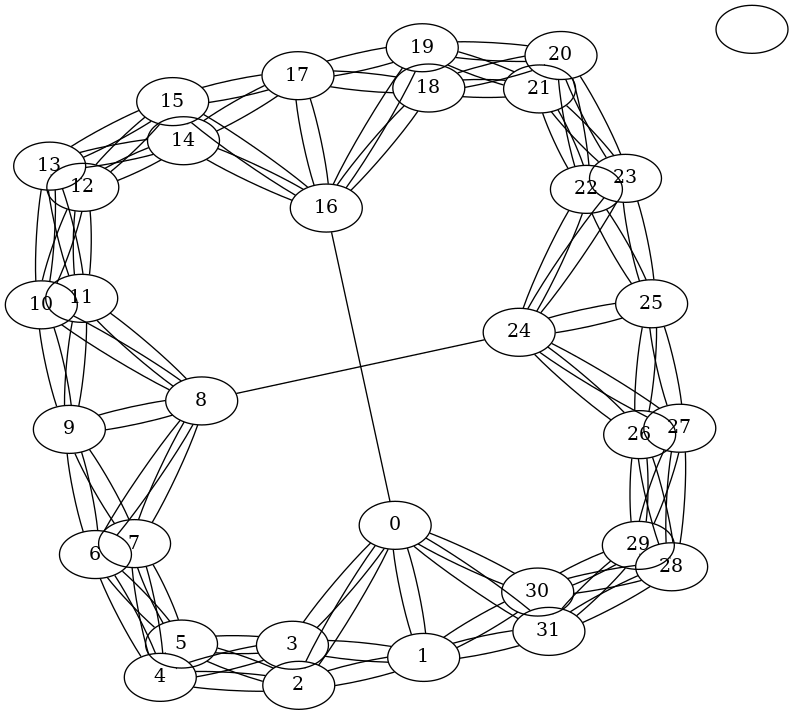

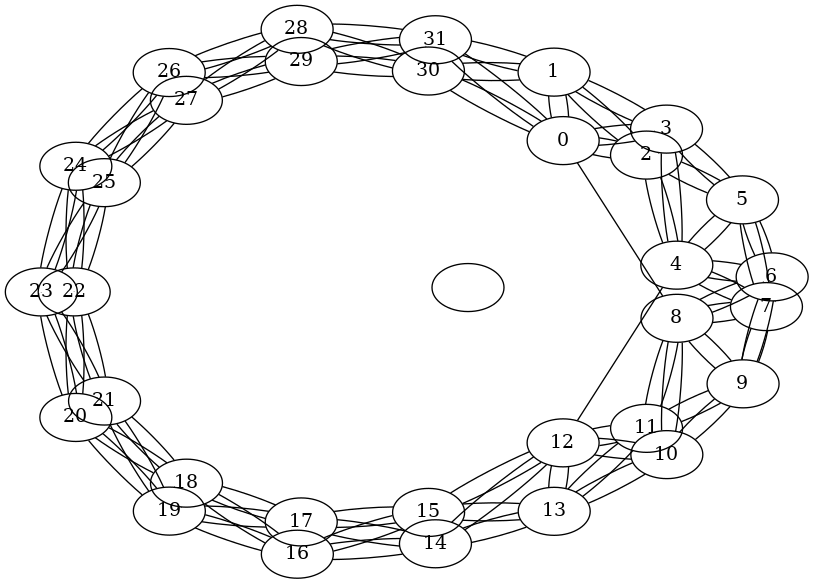

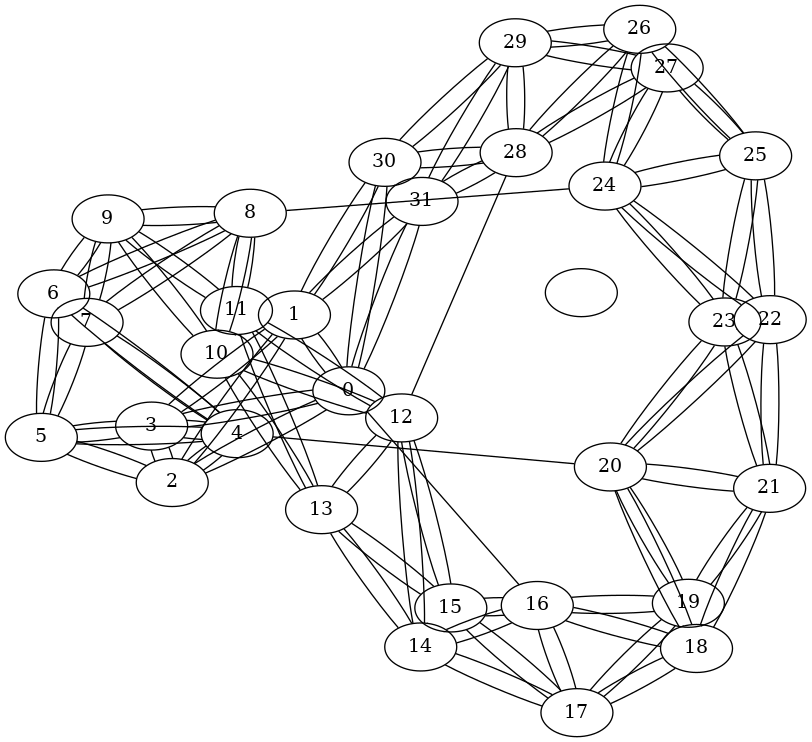

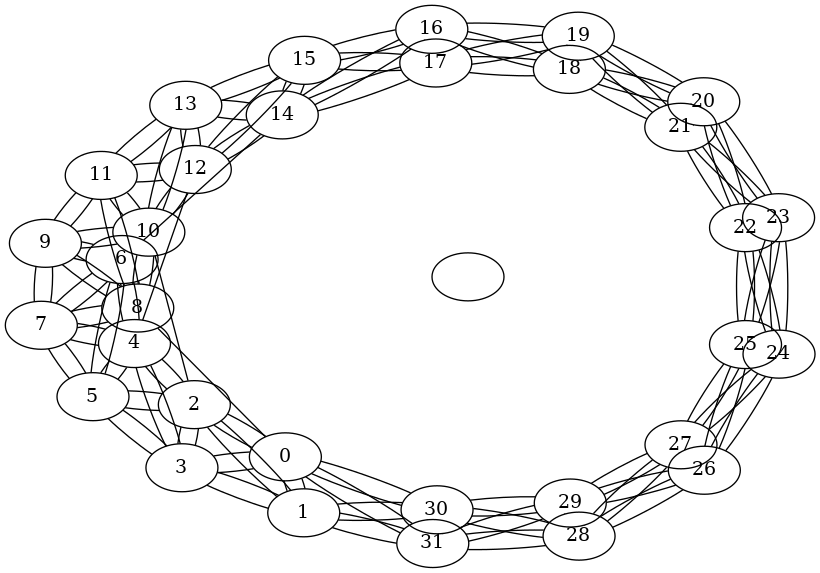

In [4]:
c = FakeCorral()
basic_corral_16_2 = corral(16,2)
basic_corral_16_2 = snail_to_connectivity(basic_corral_16_2)
display(pretty_print(basic_corral_16_2))

#check divideCorralK_math() w/ diff params
new_edges_16_2  = c.divideCorralK_math(basic_corral_16_2, 16, 2)
new_edges_32_2  = c.divideCorralK_math(basic_corral_16_2, 32, 2)
new_edges_16_4  = c.divideCorralK_math(basic_corral_16_2, 16, 4)
new_edges_32_4  = c.divideCorralK_math(basic_corral_16_2, 32, 4)

corral_16_2 = np.append(basic_corral_16_2, new_edges_16_2, axis=0)
corral_32_2 = np.append(basic_corral_16_2, new_edges_32_2, axis=0)
corral_16_4 = np.append(basic_corral_16_2, new_edges_16_4, axis=0)
corral_32_4 = np.append(basic_corral_16_2, new_edges_32_4, axis=0)

display(pretty_print(corral_32_2))
display(pretty_print(corral_16_2))
display(pretty_print(corral_32_4))
display(pretty_print(corral_16_4))

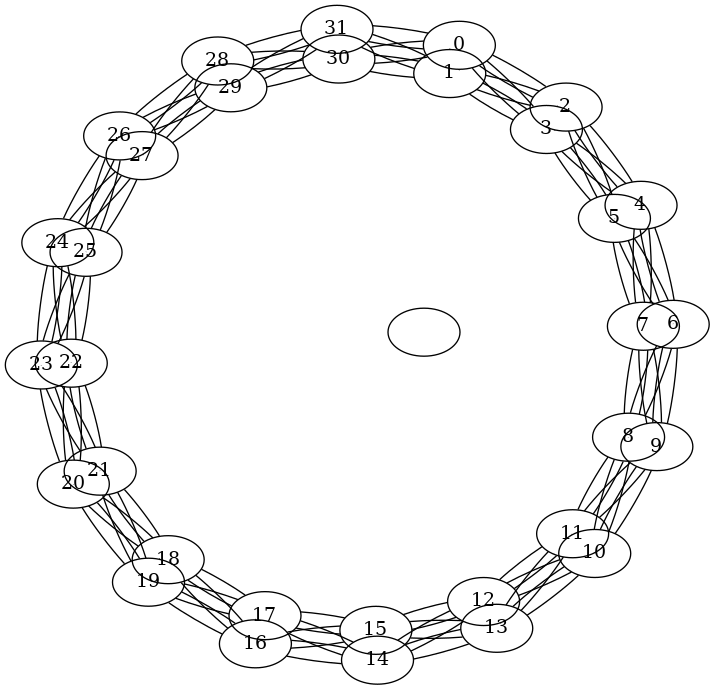

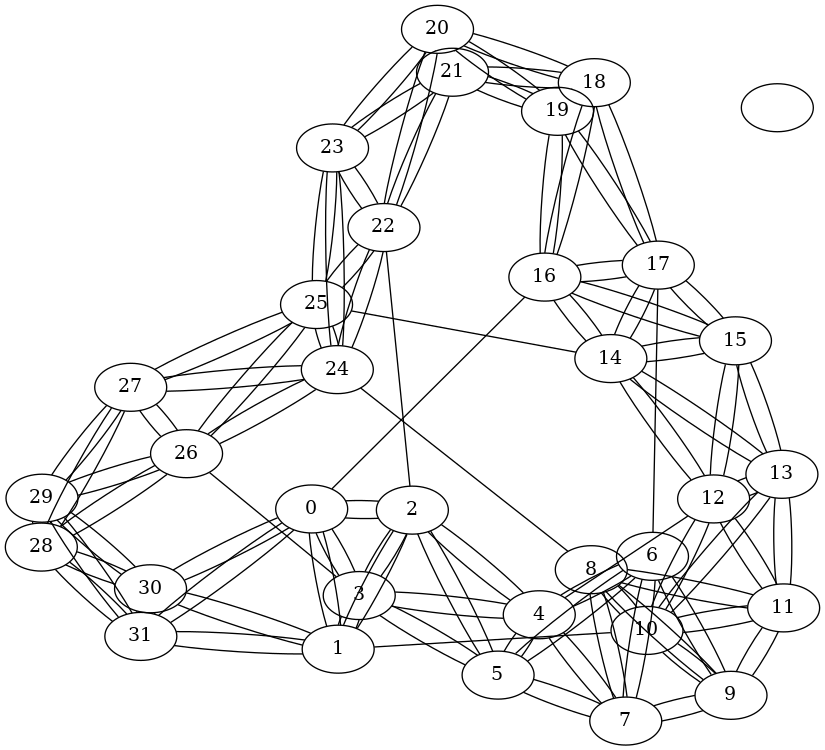

In [8]:
basic_corral_16_2 = corral(16,2)
basic_corral_16_2 = snail_to_connectivity(basic_corral_16_2)
display(pretty_print(basic_corral_16_2))

#check divideCorralK_math() w/ diff params
new_edges_32_2  = c.divideCorralK_complete(basic_corral_16_2, 32, 2)
new_edges_32_32  = c.divideCorralK_complete(basic_corral_16_2, 32, 32)
new_edges_32_16  = c.divideCorralK_complete(basic_corral_16_2, 32, 16)
new_edges_32_8  = c.divideCorralK_complete(basic_corral_16_2, 32, 8)

corral_32_2 = np.append(basic_corral_16_2, new_edges_32_2, axis=0)
corral_32_32 = np.append(basic_corral_16_2, new_edges_32_32, axis=0)
corral_32_16 = np.append(basic_corral_16_2, new_edges_32_16, axis=0)
corral_32_8 = np.append(basic_corral_16_2, new_edges_32_8, axis=0)

display(pretty_print(corral_32_2))
display(pretty_print(corral_32_32))
display(pretty_print(corral_32_16))
display(pretty_print(corral_32_8))

In [9]:
from src.clonk.backend_utils.mock_backends.Corral_backend_v1 import FakeCorral
cs = FakeCorral()
basic_corral_16_2 = corral(16,2)
print(f'init corr: {basic_corral_16_2}')
newedges  = cs.divideCorralK_complete(basic_corral_16_2, 32, 2)
print(f'after conn: {newedges}')

# basic_corral_16_2 = snail_to_connectivity(basic_corral_16_2)
# print(basic_corral_16_2)
# # print(snail_to_connectivity(basic_corral_16_2))

init corr: [(0, 1), (0, 1), (1, 2), (1, 2), (2, 3), (2, 3), (3, 4), (3, 4), (4, 5), (4, 5), (5, 6), (5, 6), (6, 7), (6, 7), (7, 8), (7, 8), (8, 9), (8, 9), (9, 10), (9, 10), (10, 11), (10, 11), (11, 12), (11, 12), (12, 13), (12, 13), (13, 14), (13, 14), (14, 15), (14, 15), (15, 0), (15, 0)]
after conn: None


In [15]:
print(len(basic_corral_16_2))

32
